---
## Section 4.4, 4.5 - Clustering Applications and Examples
---

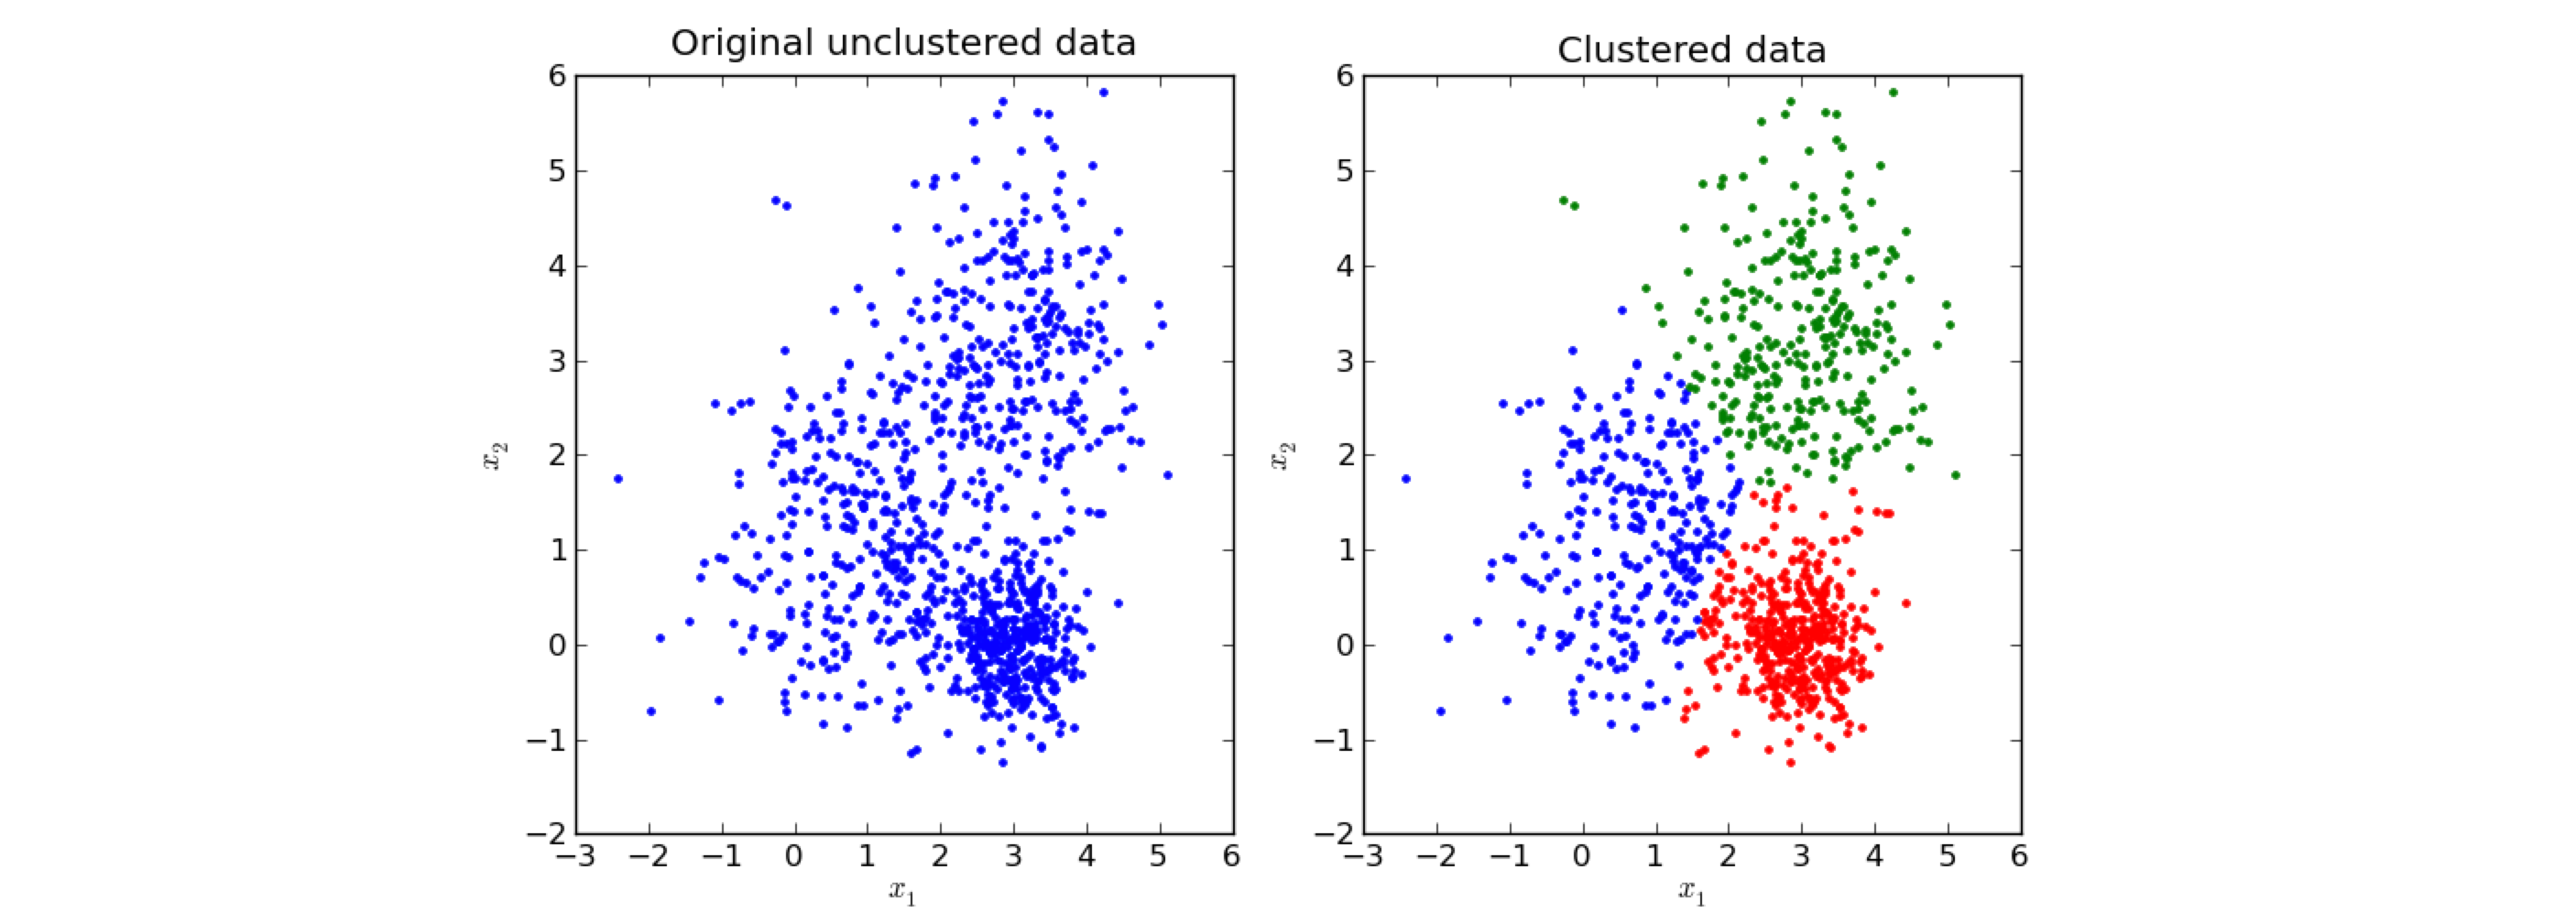

(Fig: Viswarupan, 2017)

Cluster analysis involves separating objects into groups such that each object is more similar to other objects in its group than to objects in other groups.

In this class, we are thinking of the "objects" that we are grouping as **vectors**. Each vector will have $n$ entries (aka data points with features)

It is rare to be able to obtain an ooptimal clustering. However, the K-means algorithm allows us to get "pretty good" results. 

See below for the algorithm pseudocode from our textbook. Homework 4 will involve implementing this algorithm on a dataset. 

---

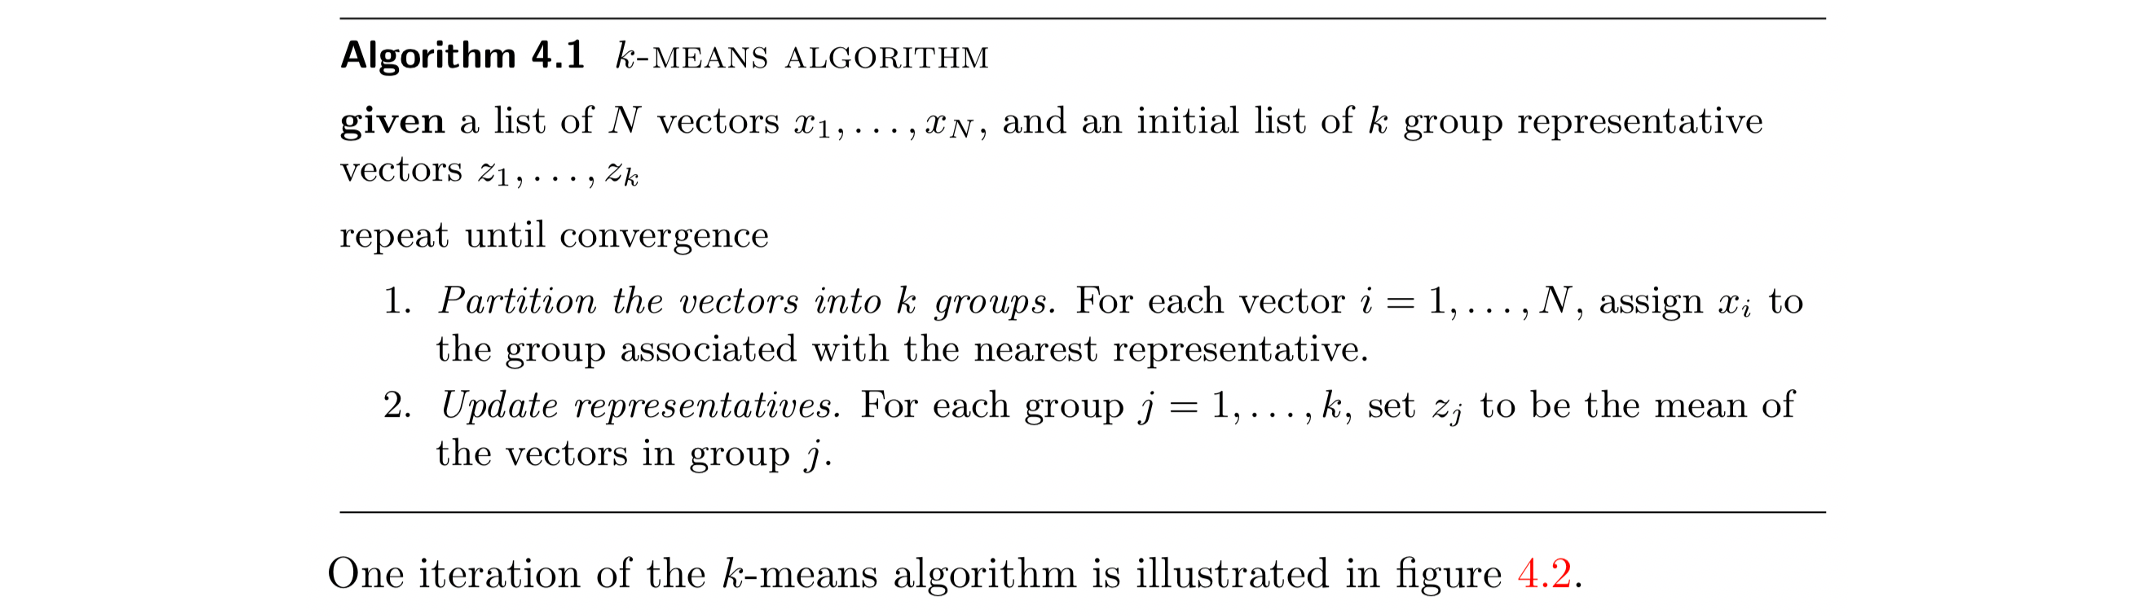

---

**PART A:** Now, before we implement the K-means algorithm ourselves, let's express in words what we are doing. Take a minute and write in your own words, what we must do.

Step 1: Pick a number of clusters and choose the representatitves

Step 2: Compute distance and group

Step 3: Recompute centroid points

Repeat!

**Solution:**

__Step 1__: Randomly choose the initial group representatives. How many should you choose? That is a little dependent on what your data looks like. The number of group representatives shoould be more than 1 and less than N (the number of datapoints/vectors).

__Step 2__: Now we will assign groups to each vector. So, we will be assigning vector $x_j$ to the cluster for which $x_j$ has the minimum distance to the cluster mean. For example, if we have 3 group representatives, we compute the distance between each vector and each of those 3 representatives. The vector is assigned to the group representative with the smallest distance.

__Step 3__: Now, each vector should have been assigned to a group. Find the **mean** of each group. Let that mean value be the new group representative.

Repeat!

**PART B:** Ok, now let's get some data, so that we can actually do an implementation of the K-means algorithm!

We are going to generate our own data to begin. We will impose 3 clusters. By generating our own data and specifying the number of clusters, we can then run an implementation of the K-means algorithm on this data and see how well the algorithm actually recovers the clusters that we designed. Since we "know" the actual solution, this will help us analyze the algorithm.

We begin by importing the `make_blobs` function from sklearn.datasets. You can read more about built-in datasets [here](https://scikit-learn.org/stable/datasets/toy_dataset.html).

In [1]:
from sklearn.datasets import make_blobs

Okay, now we will generate the dataset with the `make_blobs` function. We need to specify the following:

- n_samples:  This is the number of vectors that we want our dataset to have.
- n_features:  The is the length of each of our vectors. e.g. $v_1 = (x, y)$ has 2 features
- centers:  This is where we specify the number of clusters we'd like.
- cluster_std:  This is where we can specify a standard deviation for the groups.

Call the `make_blobs` function with values specified for each of the above arguments. Then execute the following cells to view a plot of our data.

In [2]:
# Solution:
raw_data = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 1.5)
#print(raw_data)

Next, execute the following cell which imports some useful packages and makes a scatterplot of the data.

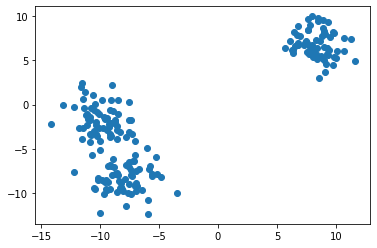

In [3]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

plt.scatter(raw_data[0][:,0], raw_data[0][:,1])

Ok, lastly, execute the following code which will show the same plot of our data, but this time with each group as a different color.

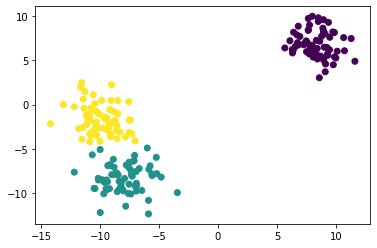

In [4]:
plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=raw_data[1])

**PART C:** Now, we will implement one iteration of K-means. Using the pseudocode given at the beginning of the notebook, implement the algorithm below. Plot a scatter plot of the end result with each group being colored a different color. Compare your groupings with what the groupings are known to be (from **PART B**).

In [5]:
# Solution:

#First we will select 3 arbitrary group members.

k = 3
N = len(raw_data[0])
rows = np.arange(0,N,1)
group_representatives = np.random.choice(rows, size=k)

list_of_group_reps = []

# This for loop will make a list of the (x,y) coordinates for each representative
for rep_num in range(k):
    representative = raw_data[0][group_representatives[rep_num]]
    list_of_group_reps.append(representative)



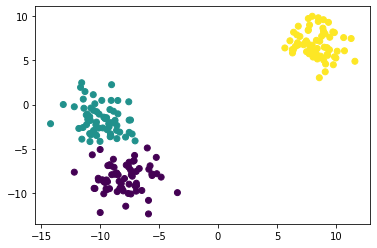

In [6]:
#Secondly, we need to loop through all of our vectors (data points) and compute the distance between each vector
# and the group representatives. We assign each vector to a group based on the minimum distance.

distances = []
group_history = []
for i in range(N):
    for j in range(k):
        # Compute distance from data point i to each group reppresentative for the k groups
        dist = np.sqrt((raw_data[0][i][0] - list_of_group_reps[j][0])**2+(raw_data[0][i][1] - list_of_group_reps[j][1])**2)
        distances.append(dist)
    group_names = np.arange(0,k,1)
  
    x = zip(distances,group_names)
    
    #Choose the minimum distance
    best_group = min(x)
    
    #Pull out the group name based on the minimum distance compute above
    best_group = best_group[1]
    
    #Keep track of each data point and which group it has been assigned to.
    group_history.append(best_group)
        
    #Empty out the distances list for the next data point
    distances = []

# This codeblock makes a figure for each step in the K-Means iteration.  
# You can rerun this cell multiple times to get different figures from different random starts.
plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=group_history)

**PART D:** Lastly, we need to choose new group representatives based on the groupings in **PART C**. We do this by computing the mean data point for each vector. 

In [7]:
# First, lets make lists of the indices that correspond to each of the k groups that are recorded in "group_history"

# We will use this index list to pull out the relevant data points from our raw data and compute a centroid for each.

# Note, this is hard-coded for 3 groupings.
group0 = []
group1 = []
group2 = []

for index, item in enumerate(group_history):
    if item == 0:
        group0.append(index)
    elif item == 1:
        group1.append(index)
    elif item == 2:
        group2.append(index)
        
groups_by_idx = [group0,group1,group2]
new_list_of_group_reps = []

for group in groups_by_idx:
    
    sum_x = 0
    sum_y = 0
    for idx_val in group:
        sum_x += raw_data[0][idx_val][0]
        sum_y += raw_data[0][idx_val][1]

    centroid_group = [sum_x/len(group),sum_y/len(group)]
    new_list_of_group_reps.append(centroid_group)   


In [8]:
new_list_of_group_reps

[[-8.017600041836547, -8.302115496106719],
 [-9.889144678418532, -1.6748759362279426],
 [8.34832583163544, 6.842023336775025]]

**PART E:** Re-run K-means using the new group representatives. Do the groupings change?

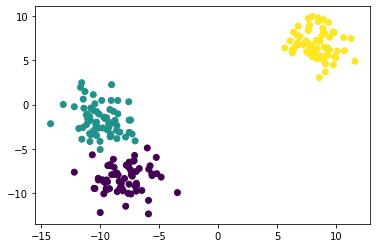

In [9]:
distances = []
group_history = []
for i in range(N):
    for j in range(k):
        # Compute distance from data point i to each group reppresentative for the k groups
        dist = np.sqrt((raw_data[0][i][0] - new_list_of_group_reps[j][0])**2+(raw_data[0][i][1] - new_list_of_group_reps[j][1])**2)
        distances.append(dist)
    group_names = np.arange(0,k,1)
  
    x = zip(distances,group_names)
    
    #Choose the minimum distance
    best_group = min(x)
    
    #Pull out the group name based on the minimum distance compute above
    best_group = best_group[1]
    
    #Keep track of each data point and which group it has been assigned to.
    group_history.append(best_group)
        
    #Empty out the distances list for the next data point
    distances = []

# This codeblock makes a figure for each step in the K-Means iteration.  
# You can rerun this cell multiple times to get different figures from different random starts.
plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=group_history)

**PART F:** Guess what?! Python has a built-in K-Means model. Execute the code below and see how the model's clusterings differ from our own.

ValueError: s must be a scalar, or float array-like with the same size as x and y

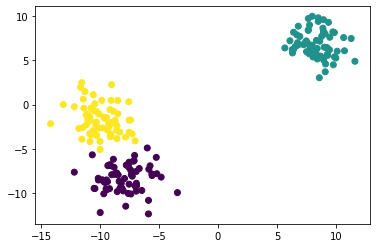

In [10]:
# generate an instance of the model with five clusters and fit to our existing data
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(raw_data[0])

# scatter plot with the Kmeans generated cluster labels and overlay x's for the cluster centroids.
plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c=[0,1,2], marker='x', s=[500, 500, 500, 500, 500])

---
Further exploration: Set up a loop to run K-means more than twice like we did. **Then** compare results. To be really sophisticated, can you figure out a way to define a tolerance so that once our cluster assignments stop changing, we stop the algorithm?